# The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.
Apply feature selection techniques

In [1]:
Attribute Information:
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

SyntaxError: invalid syntax (<ipython-input-1-7cbfd1060a2b>, line 1)

# Q1. Import libraries and Load the Data file into Python DataFrame and view top 2 rows

In [2]:
import numpy as np
import pandas as pd  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# reading the CSV file into pandas dataframe
mpg_df = pd.read_csv("car-mpg.csv") 

In [5]:
# Check top few records to get a feel of the data structure
mpg_df.head(2)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320


# Q2.  Print the datatypes of each column and check for missing values if any. Perform descriptive analysis

In [6]:
# drop the car name and origin columns
mpg_df = mpg_df.drop('car_name', axis=1)

In [7]:
mpg_df = mpg_df.replace('?', np.nan)
mpg_df = mpg_df.dropna()

In [8]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg         392 non-null float64
cyl         392 non-null int64
disp        392 non-null float64
hp          392 non-null object
wt          392 non-null int64
acc         392 non-null float64
yr          392 non-null int64
origin      392 non-null int64
car_type    392 non-null int64
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [9]:
mpg_df['hp'] = mpg_df['hp'].astype('float64')

In [10]:
mpg_df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,0.525510
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.499987
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


Text(0, 0.5, 'mpg')

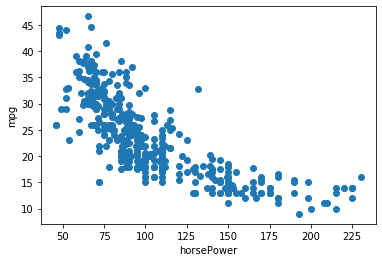

In [11]:
plt.scatter(mpg_df.hp, mpg_df.mpg, )
plt.xlabel('horsePower')
plt.ylabel('mpg')

# Q3. Split the dataset into training and test sets and fit the model. Also calculate R square

In [50]:
x = mpg_df[['hp']]
y = mpg_df['mpg']

In [51]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [52]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
# Train R^2
print(regression_model.score(x_train, y_train))

0.6042048006827028


In [54]:
# Test R^2
print(regression_model.score(x_test, y_test))

0.6059927446641062


# Q4. Calculate Mean Square Error for both train and test set

In [55]:
# Train MSE
predictedMpg = regression_model.predict(x_train)
print(mean_squared_error(predictedMpg, y_train))

23.073137254420594


In [56]:
# Test MSE
predictedMpg = regression_model.predict(x_test)
print(mean_squared_error(predictedMpg, y_test))

26.194975304568544


In [57]:
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures( degree = 2, include_bias = False) 
xPoly_train = poly.fit_transform(x_train)
xPoly_train[0:2]

array([[  88., 7744.],
       [  82., 6724.]])

In [58]:
x_train.head(2)

,hp
335,88.0
397,82.0


In [59]:
regression_modelP2 = regression_model.fit(xPoly_train, y_train)

In [60]:
# Train R^2
print(regression_modelP2.score(xPoly_train, y_train))

0.6771788501604865


In [61]:
poly = PolynomialFeatures( degree = 3, include_bias = False) 
xPoly_train = poly.fit_transform(x_train)
regression_modelPnew = regression_model.fit(xPoly_train, y_train)
# Train R^2
print(regression_modelPnew.score(xPoly_train, y_train))

0.6776172907002116


# Q5. Evaluate the model using cross validation

# K Fold Cross Validation

In [62]:
# Evaluate using Cross Validation
from sklearn import model_selection

In [63]:
seed = 6
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
kfold = model_selection.KFold(n_splits=20)

In [64]:
model = LinearRegression()

In [65]:
x.head(2)

,hp
0,130.0
1,165.0


In [ ]:
results = model_selection.cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=kfold)
print("Mean Square Error: %.3f (%.3f)" % (-resul`   pts.mean(), results.std())

# Q6. Apply Feature selection method to find which features fits well and do the plotting

# Features selection

In [67]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [85]:
x = mpg_df.drop('mpg', axis = 1)
y = mpg_df['mpg']

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [87]:
print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)

Training dataset shape: (274, 8) (274,)
Testing dataset shape: (118, 8) (118,)


In [88]:
x.shape

(392, 8)

In [89]:
# Build Lin Reg  to use in feature selection
linR = LinearRegression()

In [91]:
# Build step forward feature selection
sfs1 = sfs(linR, k_features=5, forward=True, scoring='r2', cv=5)

In [92]:
# Perform SFFS
sfs1 = sfs1.fit(x_train.values, y_train.values)

In [93]:
sfs1.get_metric_dict()

{1: {'feature_idx': (3,),
  'cv_scores': array([0.54362205, 0.63041291, 0.67296379, 0.72523906, 0.83173358]),
  'avg_score': 0.6807942791247164,
  'feature_names': ('3',),
  'ci_bound': 0.12351348849845512,
  'std_dev': 0.09609769021095473,
  'std_err': 0.048048845105477356},
 2: {'feature_idx': (3, 5),
  'cv_scores': array([0.76226899, 0.77835551, 0.81740483, 0.79369266, 0.820072  ]),
  'avg_score': 0.7943587984415493,
  'feature_names': ('3', '5'),
  'ci_bound': 0.028616668110338292,
  'std_dev': 0.022264739992113432,
  'std_err': 0.011132369996056716},
 3: {'feature_idx': (3, 5, 7),
  'cv_scores': array([0.77658548, 0.77907703, 0.82930666, 0.81516195, 0.83005954]),
  'avg_score': 0.8060381308667253,
  'feature_names': ('3', '5', '7'),
  'ci_bound': 0.030394105814325226,
  'std_dev': 0.023647646911215986,
  'std_err': 0.011823823455607991},
 4: {'feature_idx': (0, 3, 5, 7),
  'cv_scores': array([0.79164192, 0.79408855, 0.81163837, 0.83667329, 0.8569699 ]),
  'avg_score': 0.8182024052

In [94]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

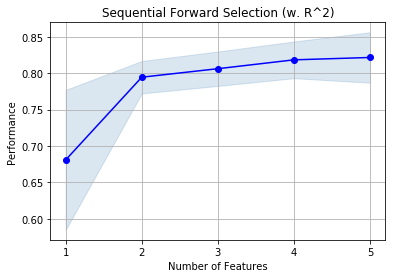

In [95]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [96]:
# Which features?
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 3, 5, 6, 7]


In [97]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['cyl', 'wt', 'yr', 'origin', 'car_type']


# Q7. Now build full model with selected features

# Build full model with selected features

In [98]:
linR = LinearRegression()
linR.fit(x_train[subsetColumnList], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [99]:
y_train_pred = linR.predict(x_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % linR.score(x_train[subsetColumnList], y_train))

Training accuracy on selected features: 0.830


In [100]:
y_test_pred = linR.predict(x_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % linR.score(x_test[subsetColumnList], y_test))

Testing accuracy on selected features: 0.837


# Q8. Build full model on all features as comparison

# Build full model on ALL features, for comparison

In [101]:
linR = LinearRegression()
linR.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [102]:
y_train_pred = linR.predict(x_train)
print('Training accuracy on selected features: %.3f' % linR.score(x_train, y_train))

Training accuracy on selected features: 0.841


In [103]:
y_test_pred = linR.predict(x_test)
print('Testing accuracy on selected features: %.3f' % linR.score(x_test, y_test))

Testing accuracy on selected features: 0.835
